<a href="https://colab.research.google.com/github/harika268/Bioinformatics-Mini-Data-Explorer/blob/main/Bioseq_Explorer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Biopython in Colab (run once)
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.8 MB/s eta 0:00:00


In [2]:
# Cell B: Imports + Load DNA sequences

from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

# Upload file manually
from google.colab import files
uploaded = files.upload()  # Choose 'sample_sequences.fasta' from your computer

# Parse FASTA file
records = list(SeqIO.parse("sample_sequences.fasta", "fasta"))
print(f"Loaded {len(records)} DNA sequences")


Saving sample_sequences.fasta to sample_sequences.fasta
Loaded 10 DNA sequences


In [7]:
def gc_percent(seq_str: str) -> float:
    s = seq_str.upper()
    if not s:
        return 0.0
    gc = s.count("G") + s.count("C")
    return round(100.0 * gc / len(s), 2)

rows = []
for r in records:
    s = str(r.seq)
    rows.append({
        "ID": r.id,
        "Length": len(s),
        "GC_Content(%)": gc_percent(s),
        "A": s.upper().count("A"),
        "T": s.upper().count("T"),
        "G": s.upper().count("G"),
        "C": s.upper().count("C"),
    })

df = pd.DataFrame(rows)
df


,ID,Length,GC_Content(%),A,T,G,C
0,seq1,27,48.15,7,7,7,6
1,seq2,26,50.00,5,8,7,6
2,seq3,25,44.00,6,8,7,4
3,seq4,25,40.00,6,9,5,5
4,seq5,26,50.00,6,7,7,6
5,seq6,26,50.00,7,6,7,6
6,seq7,26,42.31,8,7,6,5
7,seq8,26,50.00,4,9,7,6
8,seq9,26,53.85,6,6,8,6
9,seq10,26,38.46,8,8,5,5


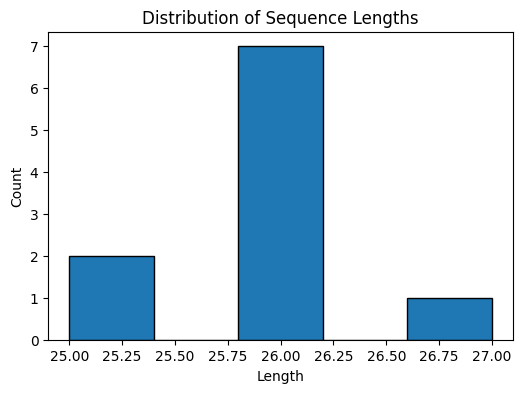

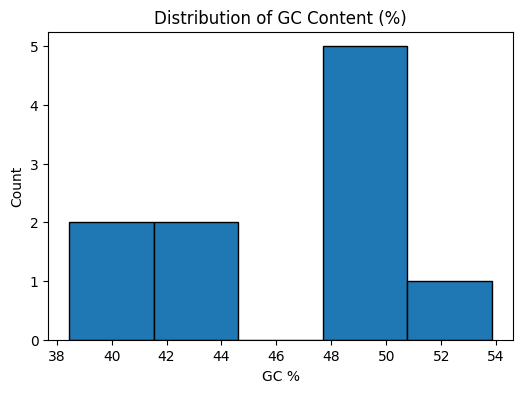

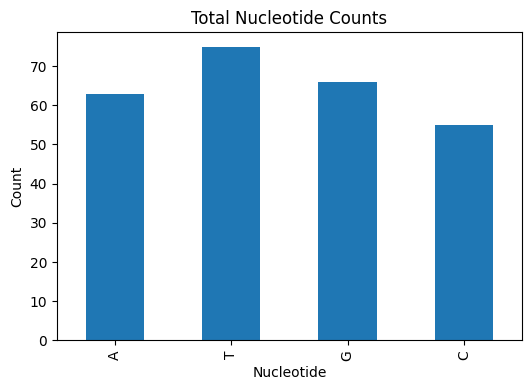

In [8]:
# Length histogram
plt.figure(figsize=(6,4))
plt.hist(df["Length"], bins=5, edgecolor="black")
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

# GC% histogram
plt.figure(figsize=(6,4))
plt.hist(df["GC_Content(%)"], bins=5, edgecolor="black")
plt.title("Distribution of GC Content (%)")
plt.xlabel("GC %")
plt.ylabel("Count")
plt.show()

# Total nucleotide counts bar chart
plt.figure(figsize=(6,4))
(df[["A","T","G","C"]].sum()).plot(kind="bar")
plt.title("Total Nucleotide Counts")
plt.ylabel("Count")
plt.xlabel("Nucleotide")
plt.show()
